# DS288-2024 Numerical Methods 
## Homework-1

Naman Pesricha Mtech CDS 06-18-01-10-51-24-1-24115

-------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: f'{x:.10e}')

### Loading the dataset

In [2]:
data = pd.read_csv('./data.csv')
data = data.set_index('n')
computed_forward = data.copy(deep=True)
computed_forward.loc[:,:] = 0
computed_backward = computed_forward.copy(deep=True)
data

,Jn(1),Jn(5),Jn(50)
n,,,
0,7.6519768656e-01,-1.7759677131e-01,5.5812327669e-02
1,4.4005058574e-01,-3.2757913759e-01,-9.7511828125e-02
2,1.1490348493e-01,4.6565116278e-02,-5.9712800794e-02
3,1.9563353983e-02,3.6483123061e-01,9.2734804062e-02
4,2.4766389641e-03,3.9123236046e-01,7.0840977282e-02
5,2.4975773021e-04,2.6114054612e-01,-8.1400247697e-02
6,2.0938338002e-05,1.3104873178e-01,-8.7121026821e-02
7,1.5023258174e-06,5.3376410156e-02,6.0491201260e-02
8,9.4223441726e-08,1.8405216655e-02,1.0405856317e-01


## Q1

### Forward Computation
- Set the first two rows with five digits and compute forward
- Iterative scheme rearranged for forward computation: 
    $J_n(x) = \frac{2(n-1)}{x}J_{n-1}(x) - J_{n-2}(x)$

In [3]:
computed_forward.iloc[:2, :] = [[7.6519e-01,-1.7759e-01,5.5812e-02],
                                  [4.4005e-01,-3.2757e-01,-9.7511e-02]]

for i in range(2,11):
    computed_forward.loc[i,'Jn(1)'] = computed_forward.loc[i-1,'Jn(1)']*2*(i-1)/1 - computed_forward.loc[i-2,'Jn(1)']
    computed_forward.loc[i,'Jn(5)'] = computed_forward.loc[i-1,'Jn(5)']*2*(i-1)/5 - computed_forward.loc[i-2,'Jn(5)']
    computed_forward.loc[i,'Jn(50)'] = computed_forward.loc[i-1,'Jn(50)']*2*(i-1)/50 - computed_forward.loc[i-2,'Jn(50)']

computed_forward
absolute_error_computed_forward = abs(computed_forward-data)
relative_error_computed_forward = absolute_error_computed_forward/data
forward_result = pd.DataFrame(
    index=['Actual_Value', 'Computed_Value','Absolute_Error','Relative_Error'], columns= ['Jn(1)','Jn(5)','Jn(50)']
)
forward_result.loc['Actual_Value'] = data.loc[10]
forward_result.loc['Computed_Value'] = computed_forward.loc[10]
forward_result.loc['Absolute_Error'] = absolute_error_computed_forward.loc[10]
forward_result.loc['Relative_Error'] = relative_error_computed_forward.loc[10]
forward_result.columns=['J10(1)','J10(5)','J10(50)']
print("Table 1.1 : Result of Forward Computation.")
forward_result

Table 1.1 : Result of Forward Computation.


,J10(1),J10(5),J10(50)
Actual_Value,2.6306151237e-10,1.4678026473e-03,-1.1384784915e-01
Computed_Value,5.6055331000e+02,1.5852559616e-03,-1.1384696301e-01
Absolute_Error,5.6055331000e+02,1.1745331430e-04,8.8613829735e-07
Relative_Error,2.1308830203e+12,8.0019827270e-02,-7.7835313005e-06


From the above data we can see that the relative error values for $J_{10}(1)$ is  in the order of $10^{12}$ (Very High) and for $J_{10}(5)$ and $J_{10}(50)$ is relatively low ($10^{-2}$ and $10^{-6}$ respectively) 

-------

## Q2

### Backward Computation
- Set the last two rows with five digits and compute backward.
- Iterative scheme rearranged for backeard computation: 
    $J_{n}(x) = \frac{2(n-1)}{x}J_{n+1}(x) - J_{n+2}(x)$

In [4]:
computed_backward.iloc[-2:, :] = [[5.2492e-09,5.5202e-03,-2.7192e-02],
                                  [2.6306e-10,1.4678e-03,-1.1384e-01]]

for i in range(8,-1,-1):
    computed_backward.loc[i,'Jn(1)'] = computed_backward.loc[i+1,'Jn(1)']*2*(i+1)/1 - computed_backward.loc[i+2,'Jn(1)']
    computed_backward.loc[i,'Jn(5)'] = computed_backward.loc[i+1,'Jn(5)']*2*(i+1)/5 - computed_backward.loc[i+2,'Jn(5)']
    computed_backward.loc[i,'Jn(50)'] = computed_backward.loc[i+1,'Jn(50)']*2*(i+1)/50 - computed_backward.loc[i+2,'Jn(50)']

computed_backward
absolute_error_computed_backward = abs(computed_backward-data)
relative_error_computed_backward = absolute_error_computed_backward/data

backward_result = pd.DataFrame(index=['Actual_Value', 'Computed_Value','Absolute_Error','Relative_Error'], columns= ['Jn(1)','Jn(5)','Jn(50)'])
backward_result.loc['Actual_Value'] = data.loc[0]
backward_result.loc['Computed_Value'] = computed_backward.loc[0]
backward_result.loc['Absolute_Error'] = absolute_error_computed_backward.loc[0]
backward_result.loc['Relative_Error'] = relative_error_computed_backward.loc[0]
backward_result.columns=['J0(1)','J0(5)','J0(50)']
print('Table 1.2: Result of Backward Computation.')
backward_result

Table 1.2: Result of Backward Computation.


,J0(1),J0(5),J0(50)
Actual_Value,7.6519768656e-01,-1.7759677131e-01,5.5812327669e-02
Computed_Value,7.6519036352e-01,-1.7759388559e-01,5.5807275575e-02
Absolute_Error,7.3230350601e-06,2.8857199839e-06,5.0520941498e-06
Relative_Error,9.5701217983e-06,-1.6248718727e-05,9.0519323611e-05


#### From the computed tables (Table 1.1 and Table 1.2) it is evident that :
- Absolute Error for x = 1 is more in Forward Computation.
- Absolute Error for x = 5 is more in Forward Computation.
- Absolute Error for x = 50 is more in Backward Computation.
- Relative Error for x = 1 is more in Forward Computation.
- Relative Error for x = 5 is more in Forward Computation.
- Relative Error for x = 50 is more in Backward Computation.

-----

## Q3

### Plotting absolute error for backward compuation and forward computation

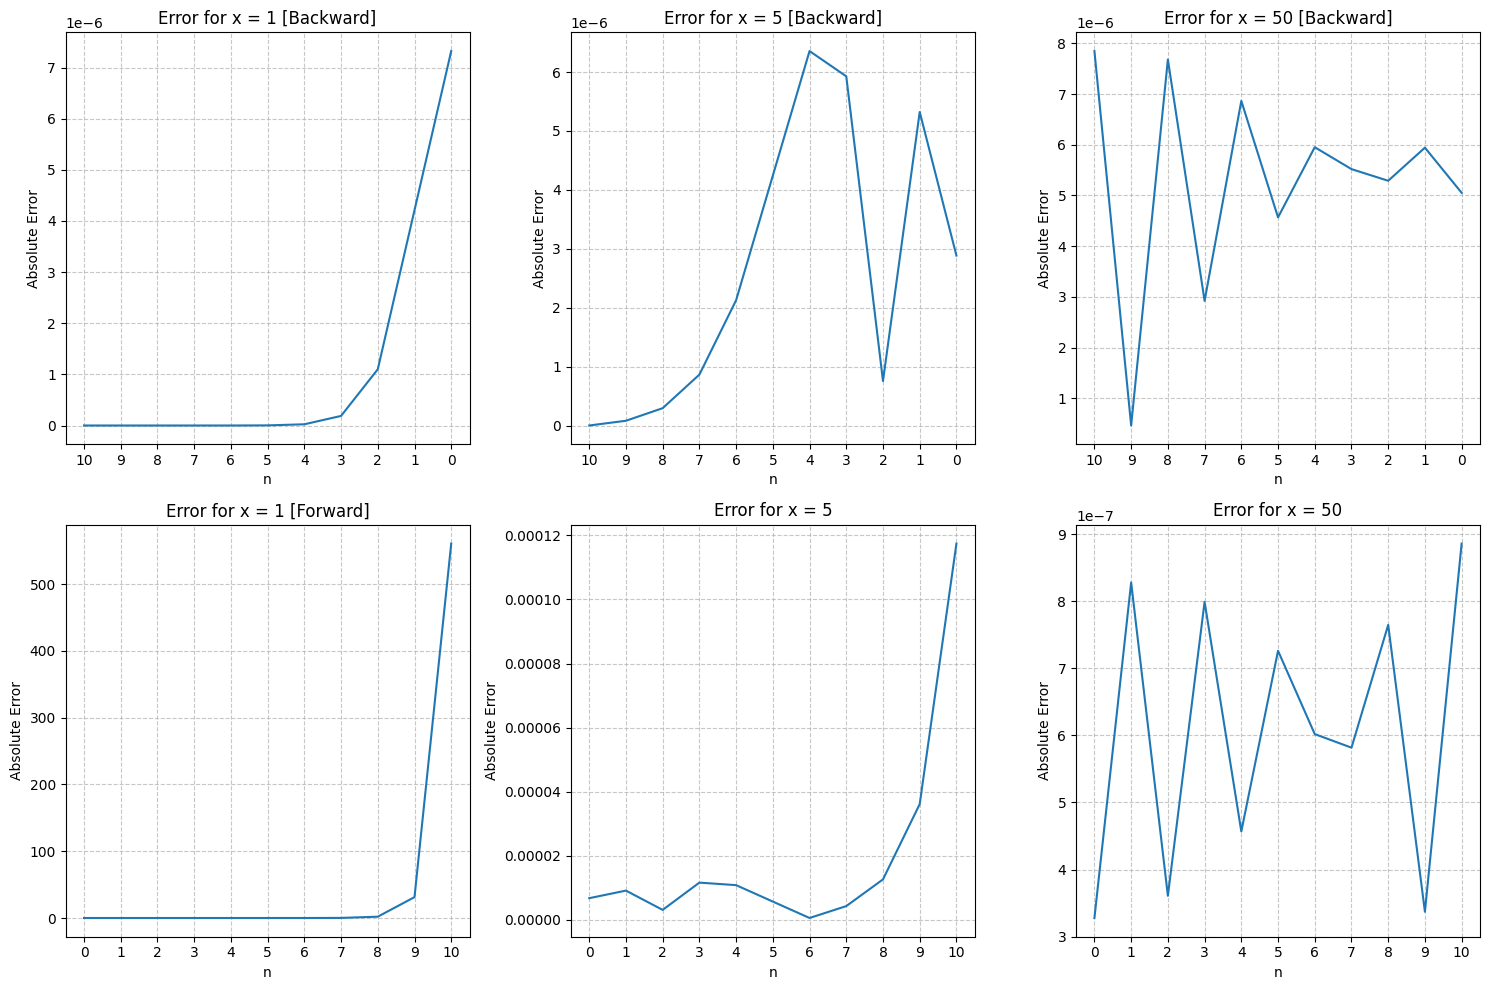

In [5]:
plt.figure(figsize=(15, 10))
custom_xticks = range(0, 11, 1)

# Plot for x = 1
plt.subplot(2, 3, 1)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(1)')
plt.title('Error for x = 1 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.gca().invert_xaxis()

# Plot for x = 5
plt.subplot(2, 3, 2)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(5)')
plt.title('Error for x = 5 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.gca().invert_xaxis()

# Plot for x = 50
plt.subplot(2, 3, 3)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(50)')
plt.title('Error for x = 50 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.xticks(ticks=custom_xticks)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()

# Plot for x = 1
plt.subplot(2, 3, 4)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(1)')
plt.title('Error for x = 1 [Forward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)

# Plot for x = 5
plt.subplot(2, 3, 5)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(5)')
plt.title('Error for x = 5')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)

# Plot for x = 50
plt.subplot(2, 3, 6)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(50)')
plt.title('Error for x = 50')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.xticks(ticks=custom_xticks)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipykernel_84442/3828921332.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_84442/3828921332.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_84442/3828921332.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_84442/3828921332.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_84442/3828921332.py:60: UserWarning: No artists with labels found to put in legend.  Note

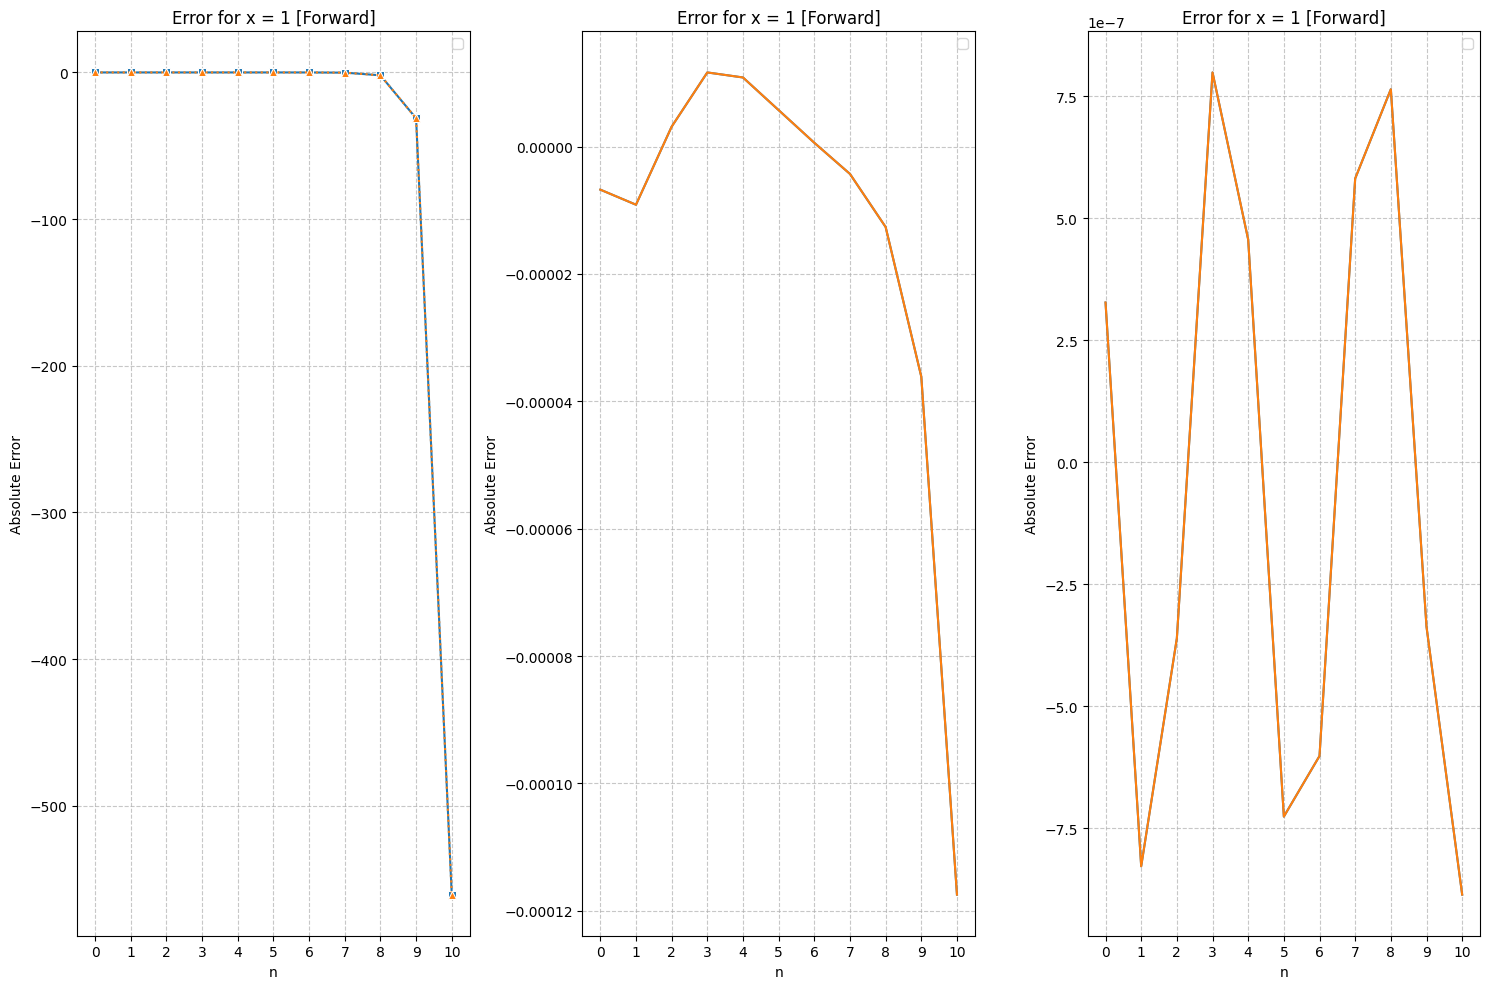

In [57]:
forward_error_propogation = data.copy(deep=True)
forward_error_propogation.loc[:,:] = 0
backward_error_propogation = data.copy(deep=True)

forward_error_propogation.loc[:1,:] = data.loc[:1,:] - computed_forward.loc[:1,:]
forward_error_propogation

for i in range(2,11):
    forward_error_propogation.loc[i, 'Jn(1)'] = (forward_error_propogation.loc[i-1,'Jn(1)']*2*(i-1)/1 - forward_error_propogation.loc[i-2, 'Jn(1)'])
    forward_error_propogation.loc[i, 'Jn(5)'] = (forward_error_propogation.loc[i-1,'Jn(5)']*2*(i-1)/5 - forward_error_propogation.loc[i-2, 'Jn(5)'])
    forward_error_propogation.loc[i, 'Jn(50)'] = (forward_error_propogation.loc[i-1,'Jn(50)']*2*(i-1)/50 - forward_error_propogation.loc[i-2, 'Jn(50)'])

forward_error_propogation
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
sns.lineplot(data=forward_error_propogation, x='n', y='Jn(1)', marker= 's')
plt.title('Error propogation x= 1 Forward')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

# Plot for x = 1
plt.subplot(1, 3, 1)
sns.lineplot(data=data - computed_forward, x='n', y='Jn(1)', marker='^',  linestyle=':')
plt.title('Error for x = 1 [Forward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

plt.subplot(1, 3, 2)
sns.lineplot(data=forward_error_propogation, x='n', y='Jn(5)')
plt.title('Error propogation x= 1 Forward')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

# Plot for x = 1
plt.subplot(1, 3, 2)
sns.lineplot(data=data - computed_forward, x='n', y='Jn(5)')
plt.title('Error for x = 1 [Forward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

plt.subplot(1, 3, 3)
sns.lineplot(data=forward_error_propogation, x='n', y='Jn(50)')
plt.title('Error propogation x= 1 Forward')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

# Plot for x = 1
plt.subplot(1, 3, 3)
sns.lineplot(data=data - computed_forward, x='n', y='Jn(50)')
plt.title('Error for x = 1 [Forward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.legend()

plt.tight_layout()
plt.show()